In [2]:
import networkx as nx            ## 네트워크 구성할 때 사용하는 library
import numpy as np               ## 여러가지 행렬계산에 용이한 library(배열)
import matplotlib.pyplot as plt  ## 그래프 그릴 때 사용
import pandas as pd
!pip install geopandas  ## goepandas 설치
import geopandas as gpd          ## geography data 사용하는데 도움을 주는 library
from google.colab import drive    ## 구글 드라이브 마운트
drive.mount('/content/drive/')

link_list = gpd.read_file('/content/drive/My Drive/2학기 캡스톤/청두링크.csv') ## 링크 리스트
street_network = nx.DiGraph()
## 노드 추가
for l, e in link_list.iterrows():
    street_network.add_node(int(e['Node_Start']), POS = (float(e['Longitude_Start']), float(e['Latitude_Start'])))
## 링크 추가
for l, e in link_list.iterrows():

    street_network.add_edge(int(e['Node_Start']),int(e['Node_End']),LINK_ID = int(e['Link']), length = float(e['Length']))
#network 그리는 함수

def drawing_network(street_network):
  plt.figure(figsize=(10,10))
  plt.title("Chengdu's road network",fontsize = 25, pad = 20)
  nx.draw_networkx(street_network,
                  pos=street_network.nodes(data='POS'), 
                  node_size=0.01,
                  with_labels=False,
                  arrows=False

  ) 

              

     |████████████████████████████████| 972kB 6.7MB/s 
     |████████████████████████████████| 14.8MB 313kB/s 
     |████████████████████████████████| 6.5MB 48.9MB/s 
Mounted at /content/drive/


In [ ]:
#appendix(b) 추세선 그리기위한 함수(선형회귀용함수)
def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m) # Orthogonal transform so far
    R = A.copy() # Transformed matrix so far

    for j in range(n):
        # Find H = I - beta*u*u' to put zeros below R[j,j]
        x = R[j:, j]
        normx = np.linalg.norm(x)
        rho = -np.sign(x[0])
        u1 = x[0] - rho * normx
        u = x / u1
        u[0] = 1
        beta = -rho * u1 / normx

        R[j:, :] = R[j:, :] - beta * np.outer(u, u).dot(R[j:, :])
        Q[:, j:] = Q[:, j:] - beta * Q[:, j:].dot(np.outer(u, u))
    return Q, R
def linearReg(A):
    m, n = A.shape
    AA = np.array([A[:,0], np.ones(m)]).T
    b = A[:, 1]

    Q, R = qr_householder(AA)
    b_hat = Q.T.dot(b)

    R_upper = R[:n, :]
    b_upper = b_hat[:n]

    x = np.linalg.solve(R_upper, b_upper)
    slope, intercept = x
    return slope, intercept 

In [ ]:
exponents=[]
critical_time=[]
clusters=[]


In [ ]:
def exponent(x,a,b,c,d,m,p,last): #x=날짜, a,b,c,d=시간, m,p,s= 분
  


  speed_list_sun = gpd.read_file('/content/drive/My Drive/2학기 캡스톤/오전오후v값들/speed[{0}]_[0].csv'.format(str(x)))
  speed_list_moon =gpd.read_file('/content/drive/My Drive/2학기 캡스톤/오전오후v값들/speed[{0}]_[1].csv'.format(str(x)))

  v_95max = np.load('/content/drive/My Drive/2학기 캡스톤/v_95max값들/v_95max_{0}.npy'.format(str(x)))


#v_max 형이 보내줬고, 그담에  두 구간의 v mean 을 구해서 v mean / v-max 해주면 3~3:04의 r 값 5943개 나온다

  #speeds_1=np.array(speed_list_sun.loc[speed_list_sun["Period"]=='{0}:{1}-{2}:{3}'.format(str(a),str(m),str(b),str(p)),'Speed'])
  speeds_1=np.array(speed_list_moon.loc[speed_list_moon["Period"]=='{0}:{1}-{2}:{3}'.format(str(a),str(m),str(b),str(p)),'Speed'])

  
  for i in range(len(speeds_1)):
          speeds_1[i]=float(speeds_1[i])

  #speeds_2=np.array(speed_list_sun.loc[speed_list_sun["Period"]=='{0}:{1}-{2}:{3}'.format(str(c),str(p),str(d),str(last)),'Speed'])
  speeds_2=np.array(speed_list_moon.loc[speed_list_moon["Period"]=='{0}:{1}-{2}:{3}'.format(str(c),str(p),str(d),str(last)),'Speed'])

  for i in range(len(speeds_2)):
          speeds_2[i]=float(speeds_2[i])

  speeds_avg= (speeds_1 + speeds_2)/2
  r=speeds_avg/v_95max
  #여기까지 3~3:04의 r값 5943개. 끝 . 이제 네트워크 그려보자

  #gcc
# giant connected component of city traffic at a rush hour time 

  q=0.0
  gcc=[]
  second_gcc=[]
  q_list=[]
  while q<=1.0:

      street_network = nx.DiGraph()
      ## 노드 추가
      for l, e in link_list.iterrows():
          street_network.add_node(int(e['Node_Start']), POS = (float(e['Longitude_Start']), float(e['Latitude_Start'])))
      ## 링크 추가
      z=0
      for l, e in link_list.iterrows():
          if r[z]>=q:

            street_network.add_edge(int(e['Node_Start']),int(e['Node_End']))
          z+=1

      cluster=[len(c) for c in sorted(nx.weakly_connected_components(street_network), key=len, reverse=True)]
    
      gcc.append(cluster[0]) #gcc
      
      if len(cluster)<2 :              #second_gcc
        second_gcc.append(0)
      if len(cluster)>1 :
        second_gcc.append(cluster[1])
      
      q_list.append(q)

      q=q+0.01    

  critical_point = q_list[second_gcc.index(max(second_gcc))]

  critical_time.append(critical_point)
  

  q=critical_point
  gcc=[]
  second_gcc=[]


  street_network = nx.DiGraph()
  ## 노드 추가
  for l, e in link_list.iterrows():
      street_network.add_node(int(e['Node_Start']), POS = (float(e['Longitude_Start']), float(e['Latitude_Start'])))
  ## 링크 추가
  z=0
  for l, e in link_list.iterrows():
      if r[z]>=q:

        street_network.add_edge(int(e['Node_Start']),int(e['Node_End']))
      z+=1

  cluster=[len(c) for c in sorted(nx.weakly_connected_components(street_network), key=len, reverse=True)]

  gcc.append(cluster[0]) #gcc

  if len(cluster)<2 :              #second_gcc
    second_gcc.append(0)
  if len(cluster)>1 :
    second_gcc.append(cluster[1])

  for i in range(len(cluster)):
    clusters.append(cluster[i])



  
  
  

  


In [ ]:
def exponent(qcqc,x,a,b,c,d,m,p,last): #x=날짜, a,b,c,d=시간, m,p,s= 분
  


  speed_list_sun = gpd.read_file('/content/drive/My Drive/2학기 캡스톤/오전오후v값들/speed[{0}]_[0].csv'.format(str(x)))
  speed_list_moon =gpd.read_file('/content/drive/My Drive/2학기 캡스톤/오전오후v값들/speed[{0}]_[1].csv'.format(str(x)))

  v_95max = np.load('/content/drive/My Drive/2학기 캡스톤/v_95max값들/v_95max_{0}.npy'.format(str(x)))


#v_max 형이 보내줬고, 그담에  두 구간의 v mean 을 구해서 v mean / v-max 해주면 3~3:04의 r 값 5943개 나온다

  speeds_1=np.array(speed_list_sun.loc[speed_list_sun["Period"]=='{0}:{1}-{2}:{3}'.format(str(a),str(m),str(b),str(p)),'Speed'])
  #speeds_1=np.array(speed_list_moon.loc[speed_list_moon["Period"]=='{0}:{1}-{2}:{3}'.format(str(a),str(m),str(b),str(p)),'Speed'])

  
  for i in range(len(speeds_1)):
          speeds_1[i]=float(speeds_1[i])

  speeds_2=np.array(speed_list_sun.loc[speed_list_sun["Period"]=='{0}:{1}-{2}:{3}'.format(str(c),str(p),str(d),str(last)),'Speed'])
  #speeds_2=np.array(speed_list_moon.loc[speed_list_moon["Period"]=='{0}:{1}-{2}:{3}'.format(str(c),str(p),str(d),str(last)),'Speed'])

  for i in range(len(speeds_2)):
          speeds_2[i]=float(speeds_2[i])

  speeds_avg= (speeds_1 + speeds_2)/2
  r=speeds_avg/v_95max
  #여기까지 3~3:04의 r값 5943개. 끝 . 이제 네트워크 그려보자

  #gcc
# giant connected component of city traffic at a rush hour time 

  
  q=qcqc
  gcc=[]
  second_gcc=[]


  street_network = nx.DiGraph()
  ## 노드 추가
  for l, e in link_list.iterrows():
      street_network.add_node(int(e['Node_Start']), POS = (float(e['Longitude_Start']), float(e['Latitude_Start'])))
  ## 링크 추가
  z=0
  for l, e in link_list.iterrows():
      if r[z]>=q:

        street_network.add_edge(int(e['Node_Start']),int(e['Node_End']))
      z+=1

  cluster=[len(c) for c in sorted(nx.weakly_connected_components(street_network), key=len, reverse=True)]

  gcc.append(cluster[0]) #gcc

  if len(cluster)<2 :              #second_gcc
    second_gcc.append(0)
  if len(cluster)>1 :
    second_gcc.append(cluster[1])

  for i in range(len(cluster)):
    clusters.append(cluster[i])


In [ ]:
time_list=[8, 8.5, 9, 9.5,9.9,12,12.5,13,13.5,13.9,17,17.5,18,18.5,18.9,21,21.5,22,22.5,22.9 ]
exponents=[]
critical_by_time_607=[0.77, 0.75 ,0.77 ,0.72 ,0.73 ,0.78 ,0.81 , 0.77 ,0.72 ,0.78, 0.76 ,0.69 ,0.69,0.67 ,0.69 ,0.72 ,0.72 ,0.74, 0.76 ,0.79]
critical_by_time_608=[0.65, 0.63, 0.65, 0.68, 0.71, 0.77, 0.78, 0.78, 0.75, 0.72, 0.73, 0.62, 0.68, 0.61, 0.64 ,0.71 ,0.71 ,0.76, 0.79, 0.78]

In [ ]:
clusters=[]
qcqc=critical_by_time_608[0]
exponent(qcqc,608,'08','08','08','08','00','02','04')

critical point = 0.65
exponent = -2.096479751519129


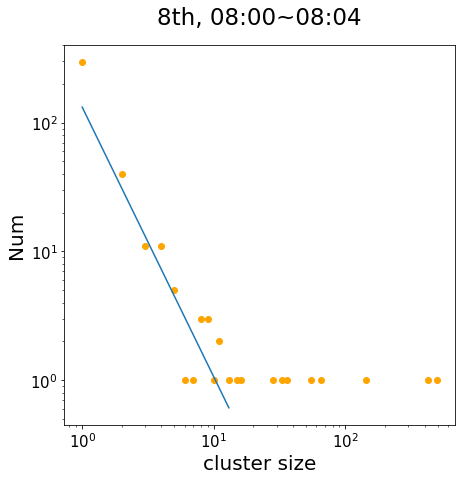

[-2.096479751519129]

In [ ]:
exponent_see(608,'08','08','08','08','00','02','04',1,100)
exponents


In [ ]:
clusters=[]
qcqc=critical_by_time_608[1]
exponent(qcqc,608,'08','08','08','08','30','32','34')

critical point = 0.63
exponent = -2.1113203346304883


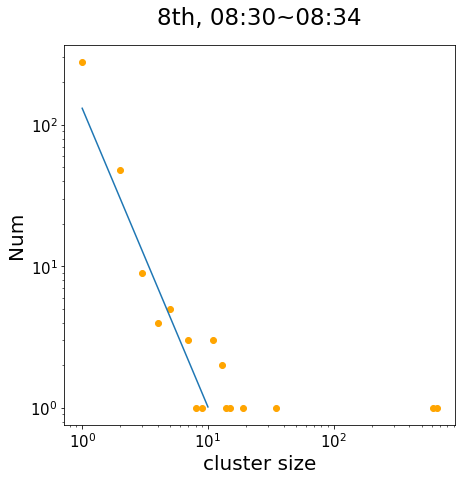

[-1.949230360400675, -1.949230360400675, -2.1113203346304883]

In [ ]:
exponent_see(608,'08','08','08','08','30','32','34',4)
exponents


In [ ]:
clusters=[]
qcqc=critical_by_time_608[2]
exponent(qcqc,608,'09','09','09','09','00','02','04')

critical point = 0.65
exponent = -2.0270700041807608


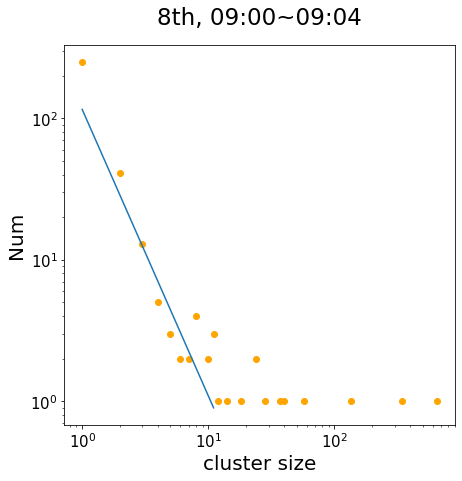

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608]

In [ ]:
exponent_see(608,'09','09','09','09','00','02','04',10)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[3]
exponent(qcqc,608,'09','09','09','09','30','32','34')


In [ ]:
def exponent_see(x,a,b,c,d,m,p,last,son,para):
  from collections import Counter
  count=Counter(clusters)

  cc_result = []
  cc_list = []
  for i in count:
    cc_list.append(i)
    cc_result.append(count[i])

  hist=cc_list[::-1]
  x_hist=cc_result[::-1]
  po=np.where(np.array(x_hist)>son)[0][-1]+int(len(np.where(np.array(x_hist)==1)[0])/para)-7
  #po=np.where(np.array(x_hist)>son)[0][-1]-
  hist=np.array(hist)[:po].reshape(1,po)
  x_hist=np.array(x_hist)[:po].reshape(1,po)

  arr=np.concatenate([hist,x_hist])

  alpha=linearReg(np.log10(arr.T[1:]))[0]
  beta=linearReg(np.log10(arr.T[1:]))[1]

  x1=np.array([10**(np.log10(1)),10**(np.log10(hist[-1][-1]+3))])
  y=(x1**alpha)*(10**beta)

  fig = plt.figure(figsize = (7,7))
  #fig = plt.gca()
  fig.set_facecolor('white')

  plt.scatter(cc_list,cc_result,c='orange')
  plt.plot(x1,y)

  plt.title("{0}th, {1}:{2}~{3}:{4}".format(str(int(x%100)),str(a),str(m),str(d),str(last)),fontsize = 23, pad = 20)


  #plt.title(' cluster size distribution', fontsize = 25, pad = 20)

  plt.xlabel('cluster size', fontsize = 20)
  plt.ylabel('Num', fontsize = 20)
  plt.yscale('log')
  plt.xscale('log')
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)

  print('critical point =', qcqc)
  print('exponent =', alpha)
  #exponents.append(alpha)
  #plt.savefig('/content/drive/My Drive/2학기 캡스톤/{0}, {1}시{2}분  '.format(str(x),str(a),str(m)),dpi=300,transparent=True)
  plt.show()

  

critical point = 0.68
exponent = -1.944731136035553


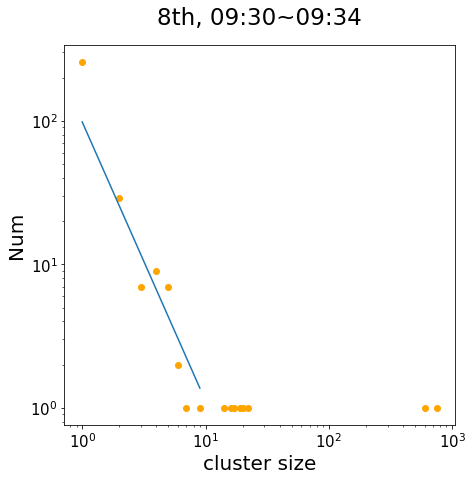

[-2.096479751519129]

In [ ]:
exponent_see(608,'09','09','09','09','30','32','34',7,1)
exponents


In [ ]:
clusters=[]
qcqc=critical_by_time_608[4]
exponent(qcqc,608,'09','09','09','10','56','58','00')

critical point = 0.71
exponent = -2.1126193041027594


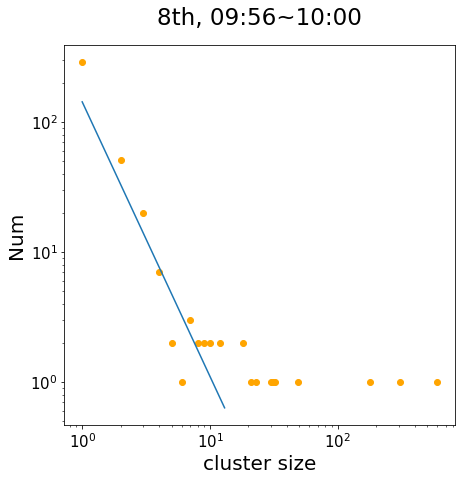

[-1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426]

In [ ]:
exponent_see(608,'09','09','09','10','56','58','00',0,1000)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_607[5]
exponent(qcqc,607,'12','12','12','12','00','02','04')



critical point = 0.78
exponent = -2.506834924110262


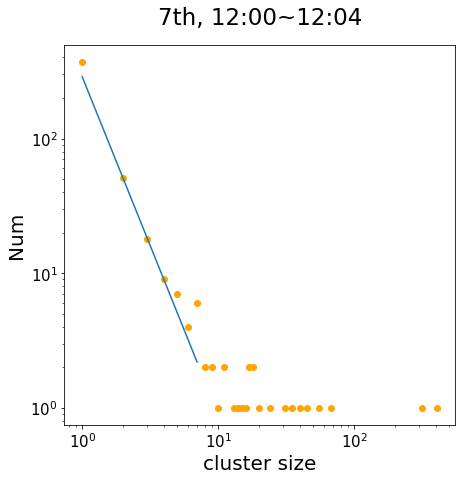

[-1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426,
 -1.934911668665518]

In [ ]:
exponent_see(607,'12','12','12','12','00','02','04',1,5)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[6]
exponent(qcqc,608,'12','12','12','12','30','32','34')



critical point = 0.78
exponent = -2.3597950092068953


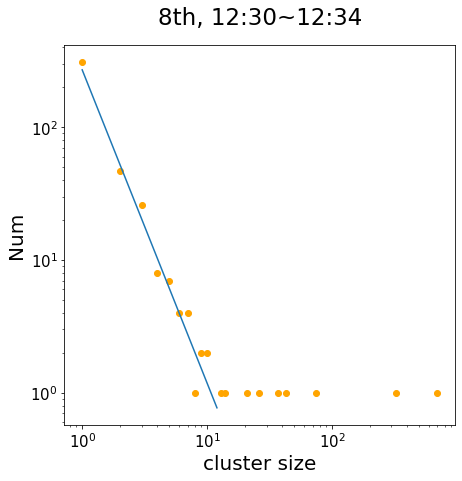

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953]

In [ ]:
exponent_see(608,'12','12','12','12','30','32','34',2,3)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_607[7]
exponent(qcqc,607,'13','13','13','13','00','02','04')



critical point = 0.77
exponent = -2.20550269475562


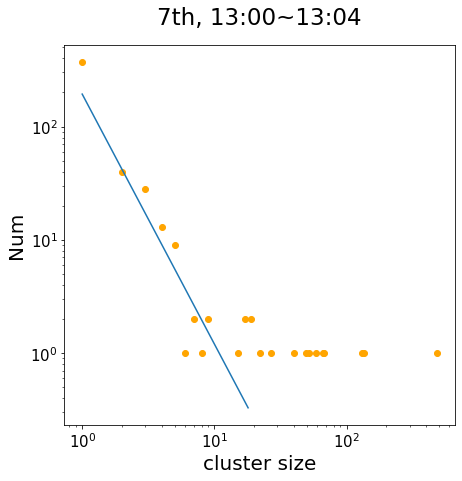

[-1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426]

In [ ]:
exponent_see(607,'13','13','13','13','00','02','04',2,5)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[8]
exponent(qcqc,608,'13','13','13','13','30','32','34')


critical point = 0.75
exponent = -2.2585877559212837


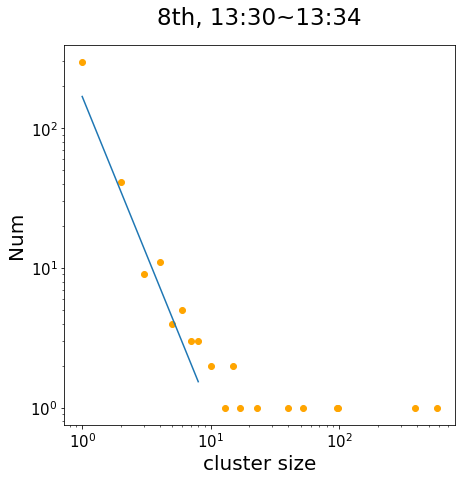

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837]

In [ ]:
exponent_see(608,'13','13','13','13','30','32','34',3,50)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_607[9]
exponent(qcqc,607,'13','13','13','14','56','58','00')


critical point = 0.78
exponent = -2.0338376645413447


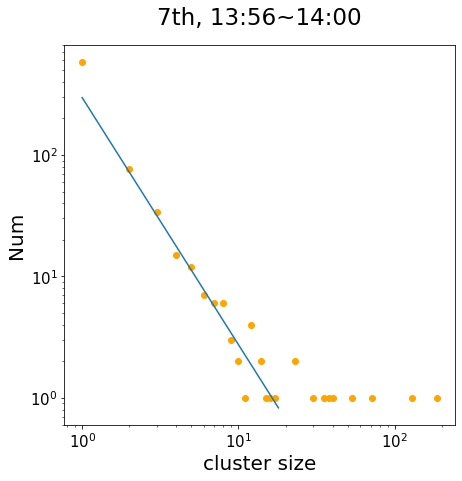

[-1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426,
 -1.934911668665518]

In [ ]:
exponent_see(607,'13','13','13','14','56','58','00',2,2)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_607[10]
exponent(qcqc,607,'17','17','17','17','00','02','04')

critical point = 0.76
exponent = -2.324909025682813


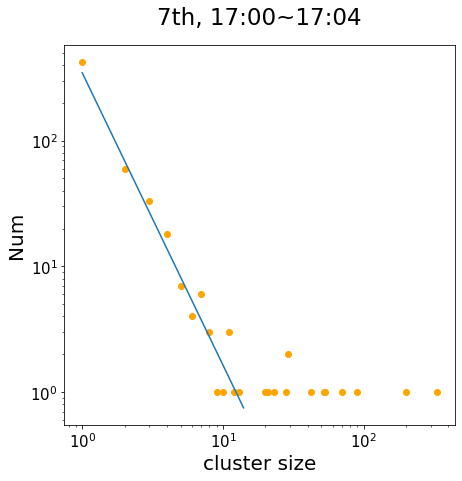

[-1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426]

In [ ]:
exponent_see(607,'17','17','17','17','00','02','04',2,20)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[11]
exponent(qcqc,608,'17','17','17','17','30','32','34')

critical point = 0.62
exponent = -1.9655054757262258


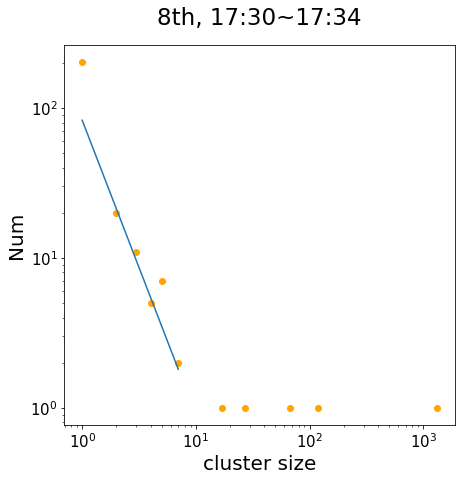

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258]

In [ ]:
exponent_see(608,'17','17','17','17','30','32','34',2,16)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[12]
exponent(qcqc,608,'18','18','18','18','00','02','04')

ValueError: ignored

critical point = 0.68
exponent = -2.042776039367026


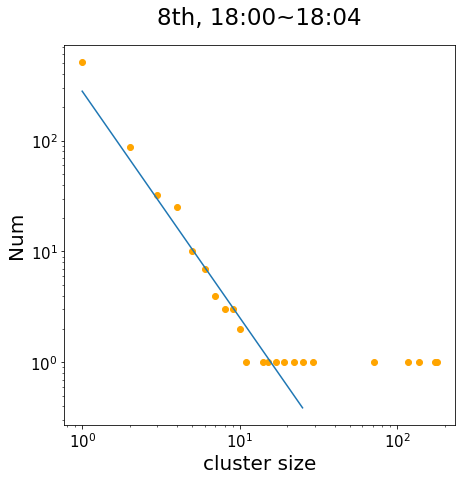

[-1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426]

In [ ]:
exponent_see(608,'18','18','18','18','00','02','04',1,10)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[13]
exponent(qcqc,608,'18','18','18','18','30','32','34')

critical point = 0.61
exponent = -1.934911668665518


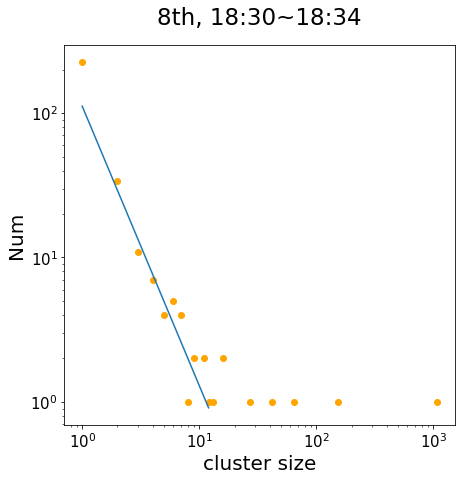

[-1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426,
 -1.934911668665518]

In [ ]:
exponent_see(608,'18','18','18','18','30','32','34',1,100)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_607[14]
exponent(qcqc,607,'18','18','18','19','56','58','00')

critical point = 0.69
exponent = -2.15979560575346


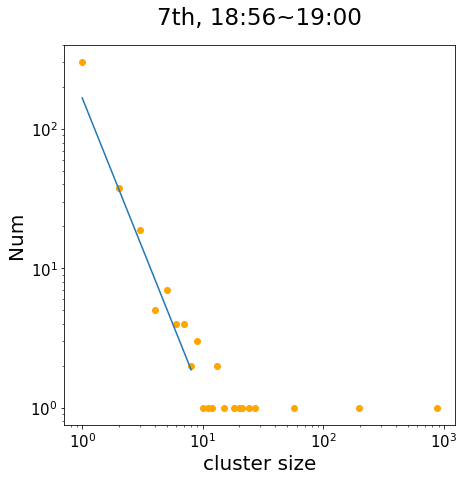

[-1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426]

In [ ]:
exponent_see(607,'18','18','18','19','56','58','00',2,15)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[15]
exponent(qcqc,608,'21','21','21','21','00','02','04')

critical point = 0.71
exponent = -2.438998930015125


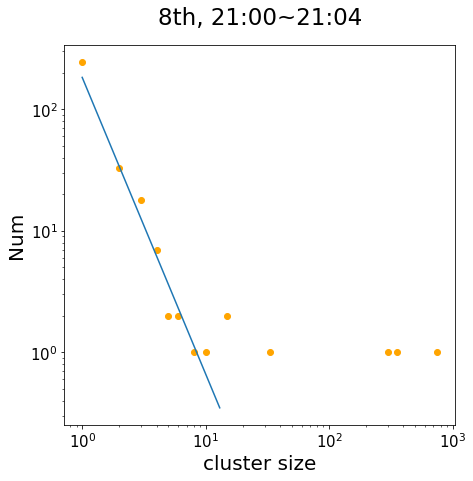

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125]

In [ ]:
exponent_see(608,'21','21','21','21','00','02','04',1,20)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[16]
exponent(qcqc,608,'21','21','21','21','30','32','34')

critical point = 0.71
exponent = -2.548007308045259


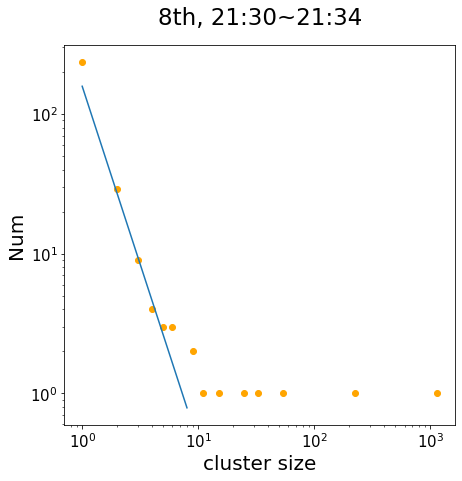

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259]

In [ ]:
exponent_see(608,'21','21','21','21','30','32','34',4,2)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[17]
exponent(qcqc,608,'22','22','22','22','00','02','04')

critical point = 0.76
exponent = -2.3076622912101636


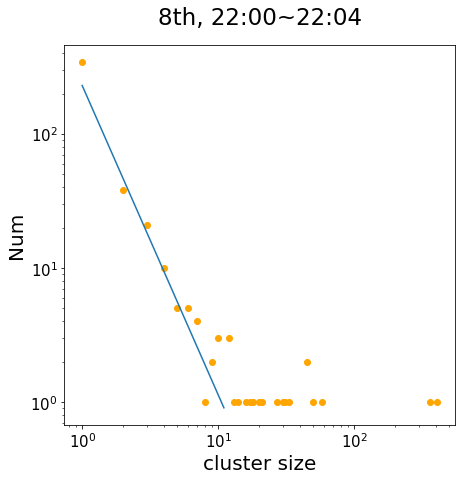

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636]

In [ ]:
exponent_see(608,'22','22','22','22','00','02','04',4,5)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[18]
exponent(qcqc,608,'22','22','22','22','30','32','34')

critical point = 0.79
exponent = -1.9568222572491842


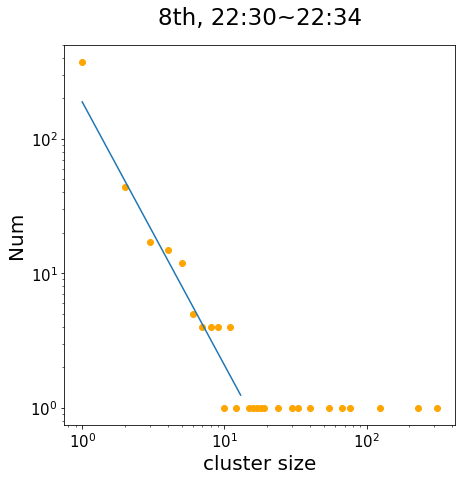

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842]

In [ ]:
exponent_see(608,'22','22','22','22','30','32','34',1,100)
exponents

In [ ]:
clusters=[]
qcqc=critical_by_time_608[19]
exponent(qcqc,608,'22','22','22','23','56','58','00')

critical point = 0.78
exponent = -2.3392580475462426


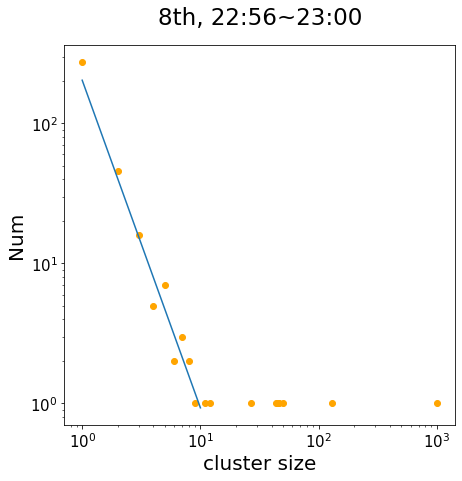

[-1.949230360400675,
 -1.949230360400675,
 -2.1113203346304883,
 -2.0270700041807608,
 -1.944731136035553,
 -2.3373801841335005,
 -2.2464531956552993,
 -2.3597950092068953,
 -2.3904043379051223,
 -2.2585877559212837,
 -2.1840375095150204,
 -1.988058921369795,
 -1.9655054757262258,
 -2.194847757237366,
 -1.934911668665518,
 -1.980975543240117,
 -2.438998930015125,
 -2.548007308045259,
 -2.3076622912101636,
 -1.9568222572491842,
 -2.3392580475462426]

In [ ]:
exponent_see(608,'22','22','22','23','56','58','00',1,40)
exponents

In [ ]:
del exponents[0]

In [ ]:
len(exponents)

20

In [ ]:
exponents_607[7]=-2.20550269475562
exponents_607[10]=-2.324909025682813
exponents_607[13]=-2.2598470026830935
exponents_608[4]=-2.1126193041027594
exponents_608[12] = -2.042776039367026

In [ ]:
exponents_608[0] = -2.096479751519129

In [ ]:
np.save('/content/drive/My Drive/2학기 캡스톤/6월7/tou_exponents_608.npy',exponents_608)


In [ ]:
np.save('/content/drive/My Drive/2학기 캡스톤/6월7/tou_exponents_607.npy',exponents_607)

In [3]:
exponents_608=np.load('/content/drive/My Drive/2학기 캡스톤/6월7/tou_exponents_608.npy')
exponents_607=np.load('/content/drive/My Drive/2학기 캡스톤/6월7/tou_exponents_607.npy')


In [25]:
sum(exponents_608)/20

-2.1617237410553485

In [10]:
exponents_608[:5]

array([-2.09647975, -2.11132033, -2.02707   , -1.94473114, -2.1126193 ,
       -2.2464532 , -2.35979501, -2.39040434, -2.25858776, -2.18403751,
       -1.98805892, -1.96550548, -2.04277604, -1.93491167, -1.98097554,
       -2.43899893, -2.54800731, -2.30766229, -1.95682226, -2.33925805])

In [15]:
sum(exponents_608[:5])

-10.292220530468692

In [32]:
(sum(exponents_608[15:20])+sum(exponents_608[5:10])+sum(exponents_607))/30

2.318376429707649

In [33]:
(sum(exponents_608[0:5])+sum(exponents_608[10:15]))/10

2.0204448178837375

In [19]:
time_list

NameError: ignored

In [21]:
time_list=[8, 8.5, 9, 9.5,9.9,12,12.5,13,13.5,13.9,17,17.5,18,18.5,18.9,21,21.5,22,22.5,22.9 ]

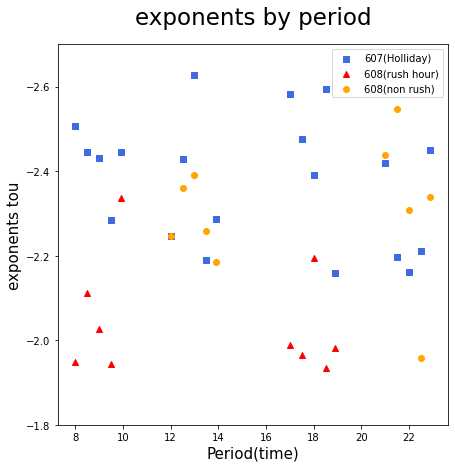

average exponents = -2.17320290139448


In [ ]:
plt.figure(figsize=(7,7))
plt.title("exponents by period",fontsize = 23, pad = 20)

plt.scatter(time_list,exponents_607, c= 'royalblue',marker='s' ,label="607(Holliday)")


plt.scatter(time_list[:5],exponents_608[:5], c='red' ,marker='^',label="608(rush hour)")

plt.scatter(time_list[5:10],exponents_608[5:10], c='orange' ,marker='o',label="608(non rush)")

plt.scatter(time_list[10:15],exponents_608[10:15], c='red' ,marker='^')

plt.scatter(time_list[15:20],exponents_608[15:20], c='orange' ,marker='o')

#plt.plot(q_list,np.array(gcc)/max(gcc))



plt.legend(loc = "best")
plt.xlabel('Period(time)',fontsize=15)
plt.ylabel('exponents tou',fontsize=15)
plt.ylim(-1.8,-2.7)
plt.savefig('/content/drive/My Drive/2학기 캡스톤/타우값모음',dpi=300,transparent=True) 
plt.show()


#critical_time.append(critical_point)


In [26]:
exponents_607=-exponents_607

In [27]:
exponents_608=-exponents_608

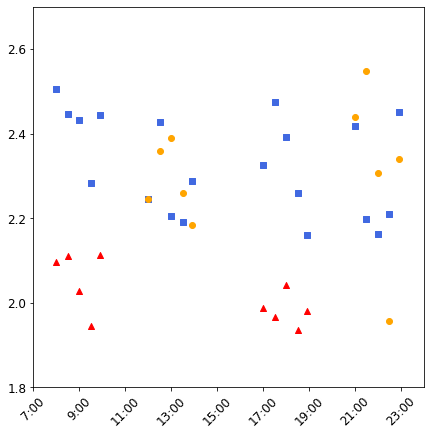

In [30]:
plt.figure(figsize=(7,7))
#plt.title("Exponents by period",fontsize = 23, pad = 20)

plt.scatter(time_list,exponents_607, c= 'royalblue',marker='s' ,label="607(Holliday)")


plt.scatter(time_list[:5],exponents_608[:5], c='red' ,marker='^',label="608(rush hour)")

plt.scatter(time_list[5:10],exponents_608[5:10], c='orange' ,marker='o',label="608(non rush)")

plt.scatter(time_list[10:15],exponents_608[10:15], c='red' ,marker='^')

plt.scatter(time_list[15:20],exponents_608[15:20], c='orange' ,marker='o')

q_list=[7,24]
q_25=[2.5,2.5]
#plt.plot(q_list,q_25)

a_list=[7,24]
a_25=[2.05,2.05]
#plt.plot(a_list,a_25)



#plt.legend(loc = "best")
#plt.xlabel('Period(time)',fontsize=15)
#plt.ylabel('Exponents',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(range(7,24,2),fontsize=12,labels=['7:00','9:00','11:00','13:00','15:00','17:00','19:00','21:00','23:00'],rotation=45)
plt.ylim(1.8,2.7,0.5)
plt.xlim(7,24)

plt.savefig('/content/drive/My Drive/2학기 캡스톤/타우선긋기',dpi=300,transparent=True) 
plt.show()



In [ ]:
exponents_607

array([2.50617234, 2.44600619, 2.43167087, 2.28357582, 2.4453265 ,
       2.24613038, 2.42784228, 2.20550269, 2.19041675, 2.28754764,
       2.32490903, 2.47605681, 2.39140917, 2.259847  , 2.15979561,
       2.41896133, 2.19747298, 2.16172008, 2.21022895, 2.45067382])